In [1]:
#RISE settings
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "serif",
            "transition": "fade",
            "start_slideshow_at": "selected",
            "autolaunch": False,
            "width": "100%",
            "height": "100%",
            "header": "",
            "footer":"",
            "scroll": True,
            "enable_chalkboard": False,
            "slideNumber": True,
            "center": False,
            "controlsLayout": "edges",
            "slideNumber": True,
            "hash": True,
        }
    )

# Programming CAD for 3D Printed Structured Materials

<table width="75%"><tr>
  <td>
      <img src="imgs/openSCAD_ball_and_stick.png" width="100%">
      <center>
        <font size="5">&quot;Ball and stick&quot; primative cubic lattice model in OpenSCAD</font>
      </center>
  </td> 
  <td>
      <img src="imgs/voxel_electrode_model.png" width="100%">
      <center>
        <font size="5">Voxelated gyroidal surface electrode support model in Python using VoxelCAD and Pyvista</font>
      </center>
  </td> 
  <td>
      <img src="imgs/Ag_gyroids.jpg" width="100%">
      <center>
        <font size="5">3D printed, silver coated gyroidal disks</font>
      </center>
  </td> 
</tr></table>

Materials that are strong, lightweight, and have open continous porosity (no dead-ends/ "blind holes") have many interesting applications:
- light-weight strong construction materials/composites
- liquid absorbant materials (sponges)
- particle size selection filters
- shock absorbers/padding
- sound absorbing/filtering materials
- catalyst supports for chemistry
- electrode supports for sensors (EEG, conductivity, electrochemical, gas concentration...)
- electrodes for devices (batteries, super-capacitors, fuel-cells)
- frameworks for growing artificial organs

### Programming CAD for 3D Printed Structured Materials

<table width="75%"><tr>
  <td>
      <img src="imgs/openSCAD_ball_and_stick.png" width="100%">
      <center>
        <font size="5">&quot;Ball and stick&quot; primative cubic lattice model in OpenSCAD</font>
      </center>
  </td> 
  <td>
      <img src="imgs/voxel_electrode_model.png" width="100%">
      <center>
        <font size="5">Voxelated gyroidal surface electrode support model in Python using VoxelCAD and Pyvista</font>
      </center>
  </td> 
  <td>
      <img src="imgs/Ag_gyroids.jpg" width="100%">
      <center>
        <font size="5">3D printed, silver coated gyroidal disks</font>
      </center>
  </td> 
</tr></table>


- How can we attempt to design parts that have finely detailed, repetitive structure?

- Are existing design and fabrication tools up to the task? 

Spoiler Alert...

- [VoxelCAD](https://gitlab.com/p-v-o-s/mechanical-cad/voxelcad/-/tree/pyvista_rebasing) is a Python package that I am developing to make 3D printable parts that have embedded complex structure
  - user interface is just Python code that leverages *object-oriented design* and *operator overloading* for expressivity (inspired by the elegant [OpenSCAD language](https://openscad.org/))
  - visualizations and mesh data processing will be provided using the [PyVista package](https://docs.pyvista.org/), a very awesome 3rd party project

### 3D Printing
<table width="50%"><tr>
  <td>
    <figure>
      <img src="imgs/prusa_mk3.jpg" width="100%">
      <figcaption><center>Prusa MK3 FDM Printer</center></figcaption>
    </figure>
  </td> 
  <td>
    <figure>
      <img src="imgs/form3.jpg" width="60%">
      <figcaption><center>Formlabs Form3 SLA Printer</center></figcaption>
    </figure>
  </td> 
</tr></table>

A distinct advantage of 3D Printing (additive manufacturing in general) is the relative ease for fabrication of complex structured materials, layer-by-layer.

Consider 2 popular types found in hobby, small business, and academic research contexts:

- Fused deposition modeling (FDM): extrudes a melted plastic filament on a plate
  - good for building large, low resolution, durable parts (ABS plastic)
  - can be most affordable option, open source options, interchangable parts

- Sterolithography (SLA): laser selectively cures photopolymer resin, solid layers are peeled off the bottom of the liquid tank
  - good for builing medium to small parts with high resolution details
  - wide array of material types, but no single resin can match all the desible mechanical properties of ABS
  - system is high maintenance, proprietary resin carttridges are more expensive

### 3D Printing Structured Materials 
<center>
  <img src="imgs/infill_patterns.jpeg" width="25%">
  <font size="5">  Credit Prusa Printers Featured Print by <a class="showlink" href=https://www.prusaprinters.org/prints/62606-infill-pattern-sample-hexagon-collection>VargaMark </a>
</font>
</center>

Infilling solid volumes with a sparse support structure is a common technique used in FDM 3D printing to save material and weight without compromising strength too much

- peformed by many print preprocessors "slicers" (eg. Slic3r, Cura)

- patterns use simple geometries, are tweakable, but ultimately limited

- pores are often closed and hidden behind a skin layer

**Important Problem** SLA printers often do not support infilling in their processing pipeline, since trapped liquid resin and suction "cupping" forces can ruin prints

# The Gyroid
<center>
  <img src="imgs/schoengeometry_best_G_photo.jpg" width="25%">
  <font size="5">First plastic gyroid model, credit <a href=https://schoengeometry.com/e-tpms.html>Alan Schoen 1968</a></font>
</center>

Gyroids are triply periodic volume spanning minimal surfaces which have a cursiously simple mathematical expression: 

 $\sin(x) \cos(y) + \sin(y) \cos(z) + \sin(z) \cos(x) = 0$
 

- discovered by NASA scientist Alan Schoen ([technical note 1970](https://ntrs.nasa.gov/citations/19700020472)), who was interested in modelling soap bubbles

- gyroid incarnations are strong because they lack sharp edges and points

- can be made with a high degree of open porosity (>90%) and there are no blind holes

**Potential Solution** gyroids won't trap liquid resin as long as pores are exposed, so we may be able to fabricate them at high resolution with SLA 3D printing!

#  Making a Gyroid: "From Math to Mesh"
Let's sprint to make a 3D printable gyroid right here in this Jupyter notebook:

In [2]:
import numpy as np    #math and array functions
from numpy import sin, cos

#create a grid of points in three dimension, split into coordinate arrays
sz = 20.0
xlim, ylim, zlim = np.vstack((3*[(-sz/2,sz/2)]))           #make a cubic span
x0,x1 = xlim;y0,y1 = ylim;z0,z1 = zlim                     #easier to work with unpacked spans
res = 256                                                  # number of points per dimension
rx,ry,rz = res*np.ones(3)                                  #copy to all dims
X,Y,Z =  np.mgrid[x0:x1:rx*1j, y0:y1:ry*1j, z0:z1:rz*1j]   #strange "imaginary" (1j) step size just means "inclusive range"

#evaluate the gyroid function on the grid
F = cos(X)*sin(Y) + cos(Y)*sin(Z) + cos(Z)*sin(X)

 #show summary data
print(F.shape,F.min(),F.max())                            

(256, 256, 256) -1.4992532595319543 1.4992532595319545


We wind up with scalar volume data defined on the 3D grid, how do we visualize it?

PyVista to the rescue! Ref: https://docs.pyvista.org/examples/00-load/create-uniform-grid.html

In [3]:
import pyvista as pv  #for visualization

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on  the CELL data
grid.dimensions = np.array(F.shape) + 1

# Edit the spatial reference
grid.spacing = ((x1-x0)/rx, (y1-y0)/ry,(z1-z0)/rz)  # These are the cell sizes along each axis

# Add the data values to the cell data
V = 255.0*F/F.max()                                 # Rescale to full range for better color-mapping
grid.cell_data["vol"] = V.flatten(order="F")        # Flatten the array!

# Show some summary data for the grid
print(grid)

# Now plot the grid!
grid.plot(volume = True)                            # Apply color map with transparency kicking in below 0

UniformGrid (0x7fd8ac1d0ca0)
  N Cells:	16777216
  N Points:	16974593
  X Bounds:	0.000e+00, 2.000e+01
  Y Bounds:	0.000e+00, 2.000e+01
  Z Bounds:	0.000e+00, 2.000e+01
  Dimensions:	257, 257, 257
  Spacing:	7.812e-02, 7.812e-02, 7.812e-02
  N Arrays:	1



ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

That looks cool, but its not *the* Gyroid surface, it's just half of this triply periodic volume function. 

And we won't be able to 3D print a volume function!

What if we if take a thin slice of this function about 0?

In [4]:
#evaluate the gyroid function on the grid
F = cos(X)*sin(Y) + cos(Y)*sin(Z) + cos(Z)*sin(X)         #repeated for clarity
Fmax = F.max()

thresh = Fmax/10                                          #a fraction of the maximum

#threshold to get a boolean array
Fs = (F > -thresh) & (F < thresh)

#compute how much of the cubic space our thin volume occupies
vol_frac = Fs.sum()/Fs.size 

#print a summary
print(f"F max: {Fmax: .3f}")
print(f"thresh: {thresh: .4f}")
print(f"Volume fraction: {vol_frac: .3f}") 

F max:  1.499
thresh:  0.1499
Volume fraction:  0.095


Let's try to visualize what we just did...

In [5]:
#we can pack this data into the grid we already made
grid.cell_data["slice"] = 1.0*Fs.flatten(order="F")     # Flatten the array, and convert to 1 -> solid, 0 -> empty

usgrid = grid.threshold(value=0.5,scalars='slice')      # Outputs an UnstructuredGrid, a subset of the original spatial grid   

usgrid.plot(color='white')

2022-01-13 14:51:36.521 (   4.393s) [        C20F6740]       vtkThreshold.cxx:84    WARN| vtkThreshold::ThresholdByUpper was deprecated for VTK 9.1 and will be removed in a future version.


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Nice! But it's a bit too Minecrafty (coarsely voxelated).

And I still don't think we can 3D print an UnstructedGrid, whatever that is!

OK, let's render it as a triangulated surface mesh (what most fabrication pipelines prefer).  

Then we can smooth it out, reduce the number of triangles for a smaller model data size, and export as an STL file.  

Luckily, PyVista has us covered.

In [6]:
surfmesh = usgrid.extract_surface()
print(f"Surface mesh with square faces: {surfmesh}")
trimesh = surfmesh.triangulate()
print(f"Surface mesh with triangle faces: {trimesh}")

#do a detailed smoothing a high resolution for best results
trimesh_filtered = trimesh.smooth(n_iter=500,progress_bar=True)

#downsample to reduce number of triangles, we do it in steps with smoothing in between for a better product
decimation_factor = 0.5 #overall size reduction goal < 1.0, higher is more aggressive shrinking
decimation_steps  = 3
for i in range(decimation_steps):
    trimesh_filtered = trimesh_filtered.decimate_pro(decimation_factor,progress_bar=True)
    trimesh_filtered = trimesh_filtered.smooth(n_iter=100,progress_bar=True)
    print(f"Step {i+1}: Filtered triangle mesh: {trimesh_filtered}")
    
#removed any small floating components (possibly at corners in this case)
trimesh_filtered = trimesh_filtered.extract_largest()

Surface mesh with square faces: PolyData (0x7fd807ff14c0)
  N Cells:	2038968
  N Points:	2038484
  X Bounds:	0.000e+00, 2.000e+01
  Y Bounds:	0.000e+00, 2.000e+01
  Z Bounds:	0.000e+00, 2.000e+01
  N Arrays:	4

Surface mesh with triangle faces: PolyData (0x7fd807fdf8e0)
  N Cells:	4077936
  N Points:	2038484
  X Bounds:	0.000e+00, 2.000e+01
  Y Bounds:	0.000e+00, 2.000e+01
  Z Bounds:	0.000e+00, 2.000e+01
  N Arrays:	4



Smoothing Mesh: 100%|██████████████████████████████████████████████[00:22<00:00]
Decimating Mesh: 100%|█████████████████████████████████████████████[00:13<00:00]
Smoothing Mesh: 100%|██████████████████████████████████████████████[00:03<00:00]


Step 1: Filtered triangle mesh: PolyData (0x7fd8060596a0)
  N Cells:	2038968
  N Points:	1019000
  X Bounds:	8.242e-03, 1.999e+01
  Y Bounds:	8.150e-03, 1.999e+01
  Z Bounds:	8.259e-03, 1.999e+01
  N Arrays:	1



Decimating Mesh: 100%|█████████████████████████████████████████████[00:07<00:00]
Smoothing Mesh: 100%|██████████████████████████████████████████████[00:02<00:00]


Step 2: Filtered triangle mesh: PolyData (0x7fd8060593a0)
  N Cells:	1019484
  N Points:	509258
  X Bounds:	1.078e-02, 1.999e+01
  Y Bounds:	1.057e-02, 1.999e+01
  Z Bounds:	1.084e-02, 1.999e+01
  N Arrays:	1



Decimating Mesh: 100%|█████████████████████████████████████████████[00:03<00:00]
Smoothing Mesh: 100%|██████████████████████████████████████████████[00:01<00:00]


Step 3: Filtered triangle mesh: PolyData (0x7fd806059a60)
  N Cells:	509742
  N Points:	254387
  X Bounds:	1.428e-02, 1.999e+01
  Y Bounds:	1.427e-02, 1.998e+01
  Z Bounds:	1.433e-02, 1.999e+01
  N Arrays:	1



Let's visualize and export the final product!

In [7]:
trimesh_filtered.plot(color='white')
trimesh_filtered.save("gyroid.stl")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## What is CAD?
> It takes an idea, and makes 3D stuff <br>
> Computer. Assisted. Design

They Might Be Giants "Computer Assisted Design" *Here Comes Science*

In [8]:
import IPython.display as ipd
ipd.Audio('audio/TMBG_CAD_clip_short.wav') # load a local WAV file

What kind of assistance do we get?

What drives the design process?

## To code, or not to code?
<table width="100%"><tr>
  <td>
    <figure>
      <img src="imgs/fusion360_screenshot.png" width="100%">
      <figcaption><center>Autodesk Fusion 360</center></figcaption>
    </figure>
  </td> 
  <td>
    <figure>
      <img src="imgs/openSCAD_screenshot_rocket.png" width="100%">
      <figcaption><center>OpenSCAD</center></figcaption>
    </figure>
  </td> 
  <td>
    <figure>
      <img src="imgs/voxelCAD_screenshot_gyroid_sphere_octant.png" width="100%">
      <figcaption><center>VoxelCAD in Python</center></figcaption>
    </figure>
  </td> 
</tr></table>

In this talk, we will consider three examples of distinct CAD approaches as described by their primary interface:

- Graphical Application Suite: AutoDesk Fusion 360, a propreitary professional design suite with a complex graphical user interface

- Domain Specific Programming: OpenSCAD, a unique language for solid geometry construction with a simple open-source IDE for coding and rendering parts (export as STL meshes)

- General Purpose Programming: Python, along with a set of 3rd party libraries can be wrangled for our structured material design purposes
  - We have started to roll out developments as an open source package, VoxelCAD

## Not to code
<center>
      <img src="imgs/fusion360_screenshot.png" width="33%">
      <figcaption><center>Autodesk Fusion 360</center></figcaption>
</center>

### Graphical interface

*Advantages*
  - used more often by professionals and taught to mechanical engineers
  - powerful software suites for product design, testing, and manufacturing applications
  - no programming experience necessary
  - often can be extended by code in embedded scripting language, but this is typically a rare use case

## Not to code
<center>
    <img src="imgs/fusion360_screenshot.png" width=33%>
    <div class="caption">Autodesk Fusion 360</div>
</center>

### Graphical interface

*Drawbacks*
- modular design is often challenging to setup and limited in scope
- the need to interact directly (point and click) with a complicated parts tree eventually taxes design process as complexity builds
- interfaces are quirky, complicated, and often unintuitive
    - too many menus and toolbar buttons, yet magical key-strokes are still needed to be productive
- often a part's history is inaccesable, especially if design is imported from a non-native file format
    - it can be hard to revert previous operations if you have gone on to make further modifications
- often have limited OS compatibility (except open source tools)
- the most popular propreitary software suites can be prohibitively expensive for non-educational use cases in small research group and commercial settings
      

## To code
<center>
    <img src="imgs/openSCAD_screenshot_rocket.png" width=33%>
    <div class="caption">OpenSCAD</div>
</center>

### Domain Specific Programming: OpenSCAD
*Advantages*
- encourages modular design using geometric principles
- easier to create and modify iterative structures, like arrays of variable objects and fractals
- tweaking a parametric design is often simple
- for programmers it can be a better "brain fit"
  - no need to memorize a dozen keystrokes and 100 nested menu and toolbar options
  - no strange issues with how a part was made/imported
    - the *code embodies the complete history and generates the data (mesh)*
  - refactoring can be productive
- open source and free tools, user community contributed libraries
- use your favorite version control system

## To code
<center>
    <img src="imgs/openSCAD_screenshot_rocket.png" width=33%>
    <div class="caption">OpenSCAD</div>
</center>

### Domain Specific Programming: OpenSCAD
*Drawbacks*
- less popular than GUI CAD, not usually taught in engineering coursework
- certain types of design can be more difficult, like free-form curved surfaces, filleted edges
- limited options for importing legacy parts files
- the implementation has efficiency issues with operations on complex parts with lots of faces
- code can be intimidating for those with less programming and math experience

## To code, more generally
<center>
    <img src="imgs/voxelCAD_screenshot_gyroid_sphere_octant.png" width=33%>
    <div class="caption">VoxelCAD in Python</div>
</center>

### General Purpose Programming: Python
*Advantages*
- many of the same coding benefits apply
- huge ecosysten of libraries, including math and science tools
- can solve design problems in new ways by composing tools from other domains
- can approximate domain specific languages with flexible Python syntax... or do it better!

## To code, more generally
<center>
    <img src="imgs/voxelCAD_screenshot_gyroid_sphere_octant.png" width=33%>
    <div class="caption">VoxelCAD in Python</div>
</center>

### General Purpose Programming: Python
*Drawbacks*
- again, certain design cases are just hard to do programmatically
- have to build up a tool chain from components
- some common CAD operations can be challenging to develop from scratch (Boolean operations on meshes, 3D rotations)

# OpenSCAD Examples
Unfortunately these examples are not runnable nor are the outputs interactive in this notebook!
## Basic Shapes

```C
$fn=100; //make curved parts have about 100 faces

//make a 10mm X 20mm X30mm box
//spheres are center in all directions by default
cube([10,20,30]);  

//make a sphere of radius 10mm translated in the X direction
//spheres are centered in all directions by default
translate([30,0,0]) sphere(10);  

//make a centered (in Z) cylinder of  height 30mm, radius 10mm translated in the -X direction
//and rotated about the X axis by 90 degrees
//NOTE: transformations are applied from right to left (like matrix notation)
rotate([90,0,0]) translate([-20,0,0]) cylinder(h=30,r=10, center=true);

```
<center>
    <img src="imgs/openSCAD_shapes.png" width=25%>
</center>

## Operations

### Union

```C
//define some global variables
H = 4;
R = 1;

//this is an operation which joins the shapes within it
union(){
    cylinder(h=H,r=R,center=true);
    rotate([90,0,0])
        cylinder(h=H,r=R,center=true);
    rotate([0,90,0])
        cylinder(h=H,r=R,center=true);
}
```
<center>
    <img src="imgs/openSCAD_3rot_cyls_union.png" width=33%>
</center>

### Intersection
We can make our own `module`, which is analogous to a function (but could also be a custom transform aaplied to other objects).  The default operation for multiple objects in a module is `union`.

```C
//this needs to be invoked with params h and r to render the shapes
module cyls3(h,r){
    cylinder(h=h,r=r,center=true);
    rotate([90,0,0])
        cylinder(h=h,r=r,center=true);
    rotate([0,90,0])
        cylinder(h=h,r=r,center=true);
}

//this operation takes only the mutually contained regions among shapes
intersection() cyls3(h=4,r=1);

```
<center>
    <img src="imgs/openSCAD_3rot_cyls_intersect.png" width=33%>
</center>

### Difference
Assuming we have the same `cyls3` module defined, let's make something that could be useful in the lab...

```C

//this operation removes all subsquent overlapping shape regions from the first
difference(){
    //the first object is positive
    hull() //find the convex hull of the object (unrelated to difference context)
        cyls3(h=4,r=1);
    //the rest are subtracted
    cyls3(h=5,r=0.8); // punch a hole through the hull
}

```
<center>
    <img src="imgs/openSCAD_3rot_cyls_difference.png" width=33%>
</center>
... a monkey-bar coupler?

## Iteration
Putting things together with a smattering of new concepts we can build a mildly interesting structured model.  

Imagine we are teaching a crystallography lecture and we want to demonstrate what a primative cubic lattice looks like using a "ball and stick" model.  Unfortunately, we lost our modelling kit.  Good thing we have a 3D printer in the lab!  Let's make a replacement...
```C
// It's good practice to parameterize your models at the top
CELL_R = 1.0;         //radius of the primative cell, this defines all scales
BALL_R_FACTOR = 0.6;  //the fractional radius the balls take up
SPHERE_FN = 32;       //keep number of faces reasonably small for performance reasons
CYLINDER_FN = 32;     //ditto
STICK_R_FACTOR = 0.2; //fractional stick radius
STICK_H_FACTOR = 2.1; //fractional stick length

//our stick is just a cylinder
module stick(r,h,fn){
    cylinder(r=r,h=h,$fn=fn,center=true);
}

//the unit is what is repeated over the lattice
module unit(ball_r, 
            stick_r,
            stick_h,
            sphere_fn=SPHERE_FN,cylinder_fn=CYLINDER_FN) //default parameters
            {     
    //ball
    color("blue") sphere(r=ball_r,$fn=sphere_fn);                 //we can apply color for visual effect here
    color("gray") {                                               /but it won't make it into our print :(
    //connections parralel to X axis
    rotate([ 0,90,0])   stick(r=stick_r,h=stick_h,fn=cylinder_fn);
    //connections parralel to Y axis
    rotate([90, 0,0])   stick(r=stick_r,h=stick_h,fn=cylinder_fn);
    //connections parralel to Z axis
    rotate([ 0, 0,0])   stick(r=stick_r,h=stick_h,fn=cylinder_fn);
    }
}

// Primative Cubic module, gets applied to one child
// it will repeat it over the lattice
module pc_array(cell_r, n1,n2,n3)  {
    //these are the basic translation vectors for the lattice
    V1 = 2*cell_r*[1,0,0];
    V2 = 2*cell_r*[0,1,0];
    V3 = 2*cell_r*[0,0,1];

    diag = (n1-1)*V1+(n2-1)*V2+(n3-1)*V3;
    V0 = -diag/2; //centers the array
    
    //we have 3 nested iterations, one for each dimension
    for(k=[0:n3-1]){
        for(j=[0:n2-1]){
            for(i=[0:n1-1]){
                v = V0 + i*V1 + j*V2 + k*V3;
                //this is where the chuld is inserted into the module
                translate(v) children(0); 
            }
        }
    }
}

// Build up the model from its components
module ball_and_stick_model(x,y,z,                            //span in each direction
                            cell_r         = CELL_R,          //primative cell size
                            ball_r_factor  = BALL_R_FACTOR,   //fractional ball radius
                            stick_r_factor = STICK_R_FACTOR,  //fractional stick radius
                            stick_h_factor = STICK_H_FACTOR,  //fractional stick length
                           ){
    //compute x,y,z span of array
    d = 2*cell_r;
    //discretize the dimensions for the iteration
    n1 = ceil(x/d);
    n2 = ceil(y/d);
    n3 = ceil(z/d);
    // invoke the primative cubic lattice iteration module (operation) on the unit module (child object)
    pc_array(cell_r=cell_r,n1=n1,n2=n2,n3=n3) {
        unit(ball_r=ball_r_factor*cell_r,
             stick_r=stick_r_factor*cell_r,
             stick_h=2*stick_h_factor*cell_r
        ); 
    }
}

// render our model with some specified dimensions
ball_and_stick_model(10,10,10);
```

<center>
    <img src="imgs/openSCAD_ball_and_stick_demo.png" width=33%>
</center>

# OpenSCAD - Performance

OpenSCAD uses the 3rd party library CGAL (Computational Geometry Algorithms Library) as a backend to generate exportable mesh data (STL file). 

We will try scaling the ball and stick model to see what kind of performance we can expect:

Number Units  Number Facets  Render Time (s)  Cache Size (MB)  \
0             1            990                1              3.6   
1             8           7512               16             53.2   
2            27          24894               81            167.0   
3            64          58464              203            391.0   
4           125         113550              474            759.0   
5           216         195480              853           1306.0   
6           343         309582             1457           2068.0   

   STL File Size (MB)  
0                0.09  
1                0.66  
2                2.20  
3                5.10  
4                9.90  
5               16.80  
6               26.50

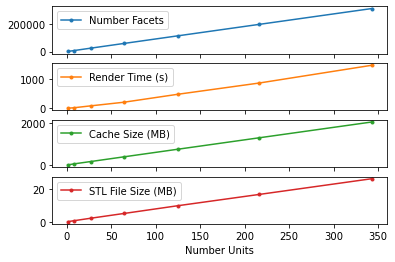

In [9]:
import pandas as pd
d = {
    #'Units per Side':     [1,2,3,4,5,6,7],
    'Number Units':       [1,8,27,64,125,216,343],
    'Number Facets':      [990,7512,24894,58464,113550,195480,309582],
    'Render Time (s)':    [1,16,81,203,474,853,1457],
    'Cache Size (MB)':    [3.6,53.2,167,391,759,1306,2068], 
    'STL File Size (MB)': [0.09,0.66,2.2,5.1,9.9,16.8,26.5],
}

df = pd.DataFrame(data=d)
display(df)

# make a plot for every column against the number of units per side
df.set_index('Number Units').plot(subplots=True,marker='.')

None# supress output from previous line

- Performance scales roughly linearly with the number of units in the model. 

- Cache size (correlated to RAM usage) is **absurdly high** even for small models, especially when compared to final STL file size

In [10]:
df['Cache Size (MB)']/df['STL File Size (MB)']

0    40.000000
1    80.606061
2    75.909091
3    76.666667
4    76.666667
5    77.738095
6    78.037736
dtype: float64

- Unfortunately, with already high multiplicative constants the implementation could be quite a bottle-neck for rendering 3 dimensional structure materials.

# VoxelCAD - The Beginning of an Idea
<center>
    <img src="imgs/VoxeCAD_screenshot_gyroid_cyl_res128.png" width=33%>
    <font size="5">  voxel model of a gyroid/cylinder intersection</font>
</center>

The problem with OpenSCAD seemed to be the inefficiency in processing surface meshes for complex models with a lot of interior space.


What if we just constructed our parts on a 3D grid using `numpy` arrays?

- Array operations are fairly efficient these days (if they can be vectorized, avoid looping over indices in Python!)

- Choosing a Voxel (Volume Element) size gives us a performance vs. quality tuning knob

- We can use *custom objects* and *operator overloading* create a simple interface inspired by OpenSCAD, but more Pythonic of course!

# Voxelating the Sphere
Let's sprint on making a volume element model of a sphere.


In [11]:
import numpy as np
import pyvista as pv

#Given the radius R and resolution fill a boolean valued cubic array with True for voxels inside the sphere 
def sphere(r,res=64):
    # This grid construction code is similar for other shapes
    size_vector = np.array(2*r)*np.ones(3)
    res_vector  = (np.array(res)*np.ones(3)).astype('uint')
    #define the grid limits for a centered sphere
    sx,sy,sz = size_vector/2
    xlim=(-sx,sx); ylim=(-sy,sy); zlim=(-sz,sz)
    #now construct the grid
    rx,ry,rz = res_vector
    x0,x1 = xlim;y0,y1 = ylim;z0,z1 = zlim                     #easier to work with unpacked spans
    X,Y,Z =  np.mgrid[x0:x1:rx*1j, y0:y1:ry*1j, z0:z1:rz*1j]
    #compute the center coordinates
    center_vector = np.array([(x0+x1)/2,(y0+y1)/2,(z0+z1)/2])
    cx,cy,cz  = center_vector
    #--------------------------------------------------------
    # Now things are particular to the spherical geometry
    V = (X-cx)**2 + (Y-cy)**2 + (Z-cz)**2 <= r**2
    return X,Y,Z,V


#make the sphere meshgrid and volume data by invoking the function above
X,Y,Z,V = sphere(1,res=64)

#OK let's wrap this quickly with a PyVista visualization
grid = pv.StructuredGrid(X,Y,Z)
#we associate the volume with grid points rather than cells, which is a bit incorrect but ok for quick vis
grid.point_data['vol'] = 255.0*V.flatten(order='F')  #conver boolean to float
#thresholding will give us the unstructured volume grid
usgrid = grid.threshold(value=128,scalars='vol')
usgrid.plot(color='white')
    

2022-01-13 14:52:37.592 (  65.464s) [        C20F6740]       vtkThreshold.cxx:84    WARN| vtkThreshold::ThresholdByUpper was deprecated for VTK 9.1 and will be removed in a future version.


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

# VoxelCAD Overview
The object-oriented interface of the VoxelCAD library:
- abstracts away grid and volume data construction steps
- provides for simple operations between classes derived from the [`VoxelModel`](https://gitlab.com/p-v-o-s/mechanical-cad/voxelcad/-/blob/main/src/voxelcad/voxel_model.py) base class
  - `|` is union (method [`__or__`](https://gitlab.com/p-v-o-s/mechanical-cad/voxelcad/-/blob/main/src/voxelcad/voxel_model.py#L337))
  - `&` is intersection  (method [`__and__`](https://gitlab.com/p-v-o-s/mechanical-cad/voxelcad/-/blob/main/src/voxelcad/voxel_model.py#L350))
  - `-` is difference (method [`__sub__`](https://gitlab.com/p-v-o-s/mechanical-cad/voxelcad/-/blob/main/src/voxelcad/voxel_model.py#L362))
- has convenient visualization and mesh export methods

Implemented VoxelModel Subclasses:
- [`Cube`](https://gitlab.com/p-v-o-s/mechanical-cad/voxelcad/-/blob/main/src/voxelcad/cube.py#L10)
- [`Sphere`](https://gitlab.com/p-v-o-s/mechanical-cad/voxelcad/-/blob/main/src/voxelcad/sphere.py#L8)
- [`Cylinder`](https://gitlab.com/p-v-o-s/mechanical-cad/voxelcad/-/blob/main/src/voxelcad/cylinder.py#L10)
- [`GyroidCube`](https://gitlab.com/p-v-o-s/mechanical-cad/voxelcad/-/blob/main/src/voxelcad/gyroid_cube.py#L8)

# VoxelCAD Demo - Sphere/GyroidCube Intersection

[`Sphere`](https://gitlab.com/p-v-o-s/mechanical-cad/voxelcad/-/blob/main/src/voxelcad/sphere.py#L8) and [`GyroidCube`](https://gitlab.com/p-v-o-s/mechanical-cad/voxelcad/-/blob/main/src/voxelcad/gyroid_cube.py#L8) are two classes derived from `VoxelModel`.

Let's instersect them, then plot and export the model:

In [12]:
#import what we are going to need
from voxelcad import ENV, Sphere, GyroidCube

#set up model parameters here
RES = 256
R = 5
GC_SIZE = R*2

#let's choose the longest dimension to choose a good voxel size based on the specified RES
ENV.voxel_size = GC_SIZE/RES #set it as global default

s = Sphere(r=R)
gc = GyroidCube(GC_SIZE,center=True,lattice_param=0.75,thresh1=-0.2,thresh2=0.2)

# the model is the intersection
model = s & gc #intersection operator is defined on special method  __and__
model.plot(color='white')  #the volume mesh will be displayed

2022-01-13 14:52:41.512 (  69.384s) [        C20F6740]       vtkThreshold.cxx:84    WARN| vtkThreshold::ThresholdByUpper was deprecated for VTK 9.1 and will be removed in a future version.


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Now lets visualize what the exported surface mesh would look like:

In [13]:
#get a triangulated surface mesh
surfmesh = model.render_surface_mesh(
                                     smooth_iters = 500,
                                     downscale_times = 3,
                                     only_largest_component = True,
                                    )
surfmesh.plot(color='white', show_edges=True)

Smoothing Mesh: 100%|██████████████████████████████████████████████[00:12<00:00]
Smoothing Mesh: 100%|██████████████████████████████████████████████[00:03<00:00]
Decimating Mesh: 100%|█████████████████████████████████████████████[00:07<00:00]
Smoothing Mesh: 100%|██████████████████████████████████████████████[00:02<00:00]
Decimating Mesh: 100%|█████████████████████████████████████████████[00:04<00:00]
Smoothing Mesh: 100%|██████████████████████████████████████████████[00:01<00:00]
Decimating Mesh: 100%|█████████████████████████████████████████████[00:02<00:00]


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Now we can export the print file!

In [14]:
model.export("spherical_gyroid.stl") # the last cached surface model will be used

# The End
Thanks to:
- Ali Banijamali for collaborating on related projects
- Dr. Liam Timms for discusions on visualizing and 3D printing volumetric data
- My wife Dr. Melissa Eliot for giving me encouragement and time to write this talk
- My son Rowan Versek for thinking some of the stuff his daddy makes on the computer is cool


In [15]:
import pyvista as pv
pv.UniformGrid((11,11,11)).plot(show_edges=True,color='red',text='Number Block 1000')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)